In [ ]:
from hashbacket import *
from pprint import pprint
import os

def update_info(update_stats):
    print("\n更新分析:")
    print(f"删除的key数: {update_stats['changes']['keys_removed']}")
    print(f"删除的元素数: {update_stats['changes']['items_removed']}")
    print(f"剩余key数: {update_stats['after']['total_keys']}")    

if __name__ == "__main__":
    #ZXW_MODIFY
    # input_file = "token_info_v2_vqa_5500k_s16k.txt"
    input_file = "token_info_v2_vqa_pretrain_5M_8k.txt"
    bins_boxs = []
    if not os.path.exists(input_file):
        print(f"文件 {input_file} 不存在！")
        assert input_file, f"文件 {input_file} 不存在！"
    else:
        processor = HashBucketProcessor(input_file)
        processor.build_buckets()
        processor.summary()
        # processor.print_example(8192)

        # capacity = 16384
        capacity = 8192    #ZXW_MODIFY
        processor.find_items(capacity)  # 寻找 capacity//2 的key
        processor.summary()
    print("====================="*8)    
    initial_summary = processor.get_hash_buckets_summary()
    print("-------------------- initial_summary ----------------------")
    pprint(initial_summary)
    # 构建追踪器
    tracker = PackingTracker(processor)
    # 第 1 轮 装填背包（2的幂次）
    bin_boxs_001 = tracker.track_packing('pack_with_deletion')
    update_stats = processor.update_hash_buckets(remove_empty=True, verbose=True)
    update_info(update_stats)

    # 第2轮 8000 以上的
    bin_boxs_002 = tracker.track_packing('pack_with_flexible_seeds',
                                         box_capacity=8192,#16384,   #ZXW_MODIFY
                                         seed_strategy="custom_half",
                                         seed_params={"half": 8000},  
                                         min_items=1,
                                         min_ratio=0.96,
                                         max_workers = os.cpu_count(),
                                        )
    update_stats = processor.update_hash_buckets(remove_empty=True, verbose=True)
    update_info(update_stats)
    
    # 第3轮 8000 以上的
    bin_boxs_003 = tracker.track_packing('pack_with_flexible_seeds',
                                         box_capacity=8192,#16384,   #ZXW_MODIFY
                                         seed_strategy="custom_half",
                                         seed_params={"half": 7000},  
                                         min_items=1,
                                         min_ratio=0.95,
                                         max_workers = os.cpu_count(),
                                        )
    update_stats = processor.update_hash_buckets(remove_empty=True, verbose=True)
    update_info(update_stats)
    
    # 第 4 轮 装填背包(所有大于一半 capacity 的种子)
    bin_boxs_004 = tracker.track_packing('pack_with_min_items_constraint_multithread',
                                        box_capacity=8192, #16384, #ZXW_MODIFY
                                        min_items=6,   # 10 for 16384 ,根据数据的分布来做
                                        min_ratio=0.92,
                                        max_workers = os.cpu_count(),
                                        )
    update_stats = processor.update_hash_buckets(remove_empty=True, verbose=True)
    update_info(update_stats)
    
    # 第 5 轮 装填背包（自由装填 for 8192）
    bin_boxs_005 = tracker.track_packing('pack_with_flexible_seeds',
                                         box_capacity=8192,#16384,   #ZXW_MODIFY
                                         seed_strategy="custom_half",
                                         seed_params={"half": 2080},  
                                         min_items=8,
                                         min_ratio=0.90,
                                         max_workers = os.cpu_count(),
                                        )
    update_stats = processor.update_hash_buckets(remove_empty=True, verbose=True)
    update_info(update_stats)

    # 第 6 轮 自由装填 for 8192
    bin_boxs_006 = tracker.track_packing('pack_with_flexible_seeds',
                                         box_capacity=8192,#16384,   #ZXW_MODIFY
                                         seed_strategy="custom_half",
                                         seed_params={"half": 1800},  
                                         min_items=4,
                                         min_ratio=0.92,
                                         max_workers = os.cpu_count(),
                                        )
    update_stats = processor.update_hash_buckets(remove_empty=True, verbose=True)
    update_info(update_stats)
    
    # 第 7 轮  自由装填 for 8192
    bin_boxs_007 = tracker.track_packing('pack_with_flexible_seeds',
                                         box_capacity=8192,#16384,   #ZXW_MODIFY
                                         seed_strategy="custom_half",
                                         seed_params={"half": 1280},  
                                         min_items=6,
                                         min_ratio=0.92,
                                         max_workers = os.cpu_count(),
                                        )
    update_stats = processor.update_hash_buckets(remove_empty=True, verbose=True)
    update_info(update_stats)
    
    # 第 8 轮  自由装填 for 8192
    bin_boxs_007 = tracker.track_packing('pack_with_flexible_seeds',
                                         box_capacity=8192,
                                         seed_strategy="top_n",
                                         seed_params={"n": 20}, # 1 for 16384  
                                         min_items=4,
                                         min_ratio=0.90,
                                         max_workers = os.cpu_count(),
                                        )
    update_stats = processor.update_hash_buckets(remove_empty=True, verbose=True)
    update_info(update_stats)


2025-08-14 16:37:27,219 - INFO - 开始处理文件，总行数: 5520733
构建哈希桶:  98%|███████████████████████████████████████▏| 5400000/5520733 [00:05<00:00, 662131.48行/s]

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from font(s) DejaVu Sans.
  fig.canvas

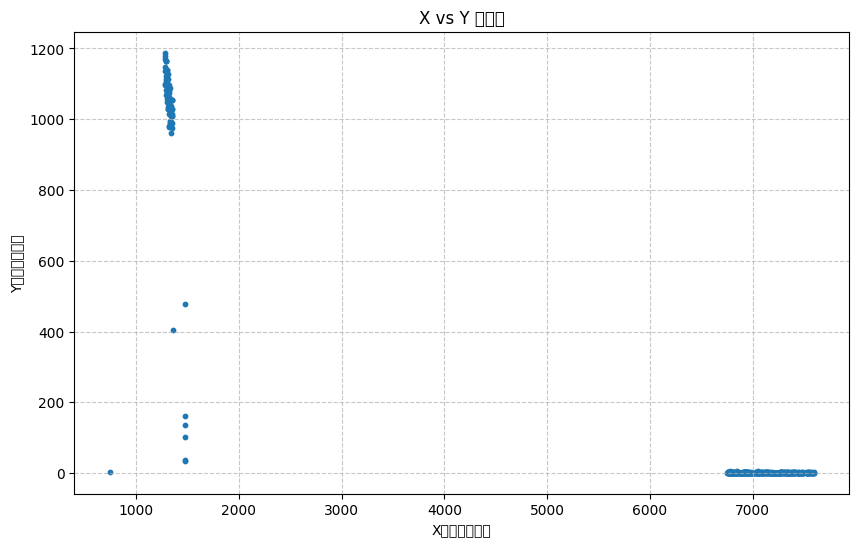

In [2]:
all_rems=[(k,len(processor.hash_buckets[k])) for k in processor.hash_buckets]
import matplotlib.pyplot as plt

# 假设 all_rems 是你已有的列表，例如：
# all_rems = [(1000, 1075), (1001, 569), ...]

# 提取 x 和 y 数据
x_values = [item[0] for item in all_rems]
y_values = [item[1] for item in all_rems]

# 创建图形
plt.figure(figsize=(10, 6))  # 设置图形大小（可选）

# 绘制散点图（推荐用于观察分布）
plt.scatter(x_values, y_values, s=10)  # s 控制点的大小

# 或者绘制折线图（如果数据有序）
# plt.plot(x_values, y_values)

# 添加标签和标题
plt.xlabel('X轴（第一列）')
plt.ylabel('Y轴（第二列）')
plt.title('X vs Y 散点图')

# 显示网格（可选）
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming allrems is a list of lists where each sublist contains [x, y]
# Extract x and y values
x_values = [item[0] for item in all_rems]
y_values = [item[1] for item in all_rems]

# Define the number of bins
num_bins = 10

# Create bins based on x values
bins = np.linspace(min(x_values), max(x_values), num_bins + 1)

# Calculate sum of y values for each bin
bin_indices = np.digitize(x_values, bins) - 1
bin_sums = np.zeros(num_bins)
for i in range(len(x_values)):
    if 0 <= bin_indices[i] < num_bins:
        bin_sums[bin_indices[i]] += y_values[i]

# Create the histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(bins[:-1], bin_sums, width=np.diff(bins), edgecolor='black', align='edge')

# Add labels on top of each bar showing the sum
for bar, sum_val in zip(bars, bin_sums):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{sum_val:.1f}', ha='center', va='bottom')

plt.xlabel('X Values')
plt.ylabel('Sum of Y Values')
plt.title('Histogram of Y Value Sums by X Range')
plt.grid(True, alpha=0.3)
plt.show()

NameError: name 'all_rems' is not defined

In [ ]:
tracker.print_summary() 